In [ ]:

# import the most useful packages
import numpy as np 
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import IPython.display as ipd
print('finished importing')
! pip install librosa
import librosa
import librosa.display


finished importing
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
file1 = '/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/lie_audio/trial_lie_001.wav'
audio1, sample_rate1 = librosa.core.load(file1)
print(sample_rate1, audio1.shape, audio1.shape[0]/sample_rate1)
ipd.Audio(audio1, rate=sample_rate1)

file2 = '/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/lie_audio/trial_lie_002.wav'
audio2, sample_rate2 = librosa.core.load(file2)
print(sample_rate2, audio2.shape, audio2.shape[0]/sample_rate2)
ipd.Audio(audio1, rate=sample_rate1)

22050 (373968,) 16.96
22050 (1377802,) 62.485351473922904


In [ ]:
import matplotlib.cm as cm

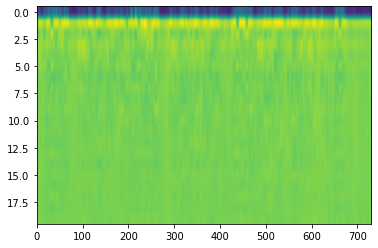

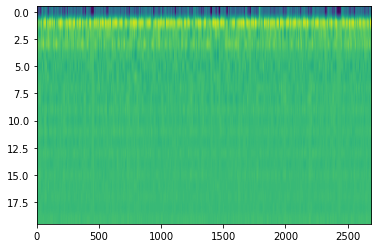

(20, 2692)
1377802


In [ ]:
mfcc = librosa.feature.mfcc(y=audio1, sr=sample_rate1, n_mfcc=20)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=audio2, sr=sample_rate2, n_mfcc=20)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

print(mfcc.shape)
print(len(audio2))

def mp3tomfcc(file_path, max_pad):
  audio, sample_rate = librosa.core.load(file_path)
  mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)
  pad_width = max_pad - mfcc.shape[1]
  if (pad_width > 0):
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  else:
    mfcc = mfcc[:,0:max_pad]
  return mfcc
  

In [ ]:
mfccs = []
new_path = '/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/lie_audio_edited'
index = 0


if os.path.exists(new_path):
  for f in os.listdir(new_path):
      if f.endswith('.wav'):
        mfccs.append(mp3tomfcc(new_path + '/' + f, 1000)) 
        index = index + 1
        print(index)

new_path = '/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/truth_audio'
index = 0
if os.path.exists(new_path):
  for f in os.listdir(new_path):
      if f.endswith('.wav'):
        mfccs.append(mp3tomfcc(new_path + '/' + f, 1000)) 
        index = index + 1
        print(index)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [ ]:
# Save all MFCCs so that don't have to recreate MFCC array every run
mfccs = np.asarray(mfccs)
print(mfccs.shape)
np.save('mfccs_all_loy_no_pad1000.npy', mfccs)
mfccs_loaded = np.load('mfccs_all_loy_no_pad1000.npy')
print(mfccs_loaded[0])


(116, 20, 1000)
[[-435.5253     -421.8226     -411.65085    ... -288.1148
  -294.45862    -285.0767    ]
 [ 111.18883     113.83798     112.024704   ...  179.02193
   180.81754     185.35672   ]
 [ -40.767136    -43.689316    -47.93284    ...  -88.702225
   -80.00966     -77.64778   ]
 ...
 [   3.814518      3.2968206     1.75897    ...   -7.0991964
    -8.164736     -9.405052  ]
 [   5.738967      4.69736       0.69736725 ...    2.7881818
     4.0630493     5.6891813 ]
 [ -13.56604     -11.420456    -12.981556   ...   -5.6943846
    -7.774087    -11.429594  ]]


In [ ]:
# Gather all labels
# truth = 0; lie = 1
labels = []

file_path = '/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/lie_audio_edited'
index = 0
numTruth = 0
numLie = 0

if os.path.exists(file_path):
  for f in os.listdir(file_path):
      if f.endswith('.wav'):
        labels.append(1)
        numLie = numLie + 1 
        index = index + 1
        print(index)

file_path = '/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/truth_audio'
index = 0
if os.path.exists(file_path):
  for f in os.listdir(file_path):
      if f.endswith('.wav'):
        labels.append(0)
        numTruth = numTruth + 1
        index = index + 1
        print(index)




print(numTruth)
print(numLie)
print(numTruth + numLie)
print(numTruth/(numTruth + numLie))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
58
58
116
0.5


In [ ]:
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes=None)
print(labels.shape)

(116, 2)


In [ ]:
# load labels into drive to avoid having to recreate labels every run
np.save('labels_all_loy_.npy', labels)
labels_loaded = np.load('labels_all_loy_.npy')

In [ ]:
# get pitches
def mp3topitch(file_path, max_pad1, max_pad2):
  audio, sample_rate = librosa.core.load(file_path)
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
  print(pitch.shape)
  if (pitch.shape[0] < max_pad1):
    pad_width = max_pad1 - pitch.shape[0]
    pitch = np.pad(pitch, pad_width=((0, 0), (0, pad_width)), mode='constant')
  else: pitch = pitch[0:max_pad1]

  if (pitch.shape[1] < max_pad2):
    pad_width = max_pad2 - pitch.shape[1]
    pitch = np.pad(pitch, pad_width=((0, 0), (0, pad_width)), mode='constant')
  else: pitch = pitch[:,0:max_pad2]
  
#   if (pitch.shape[1] != max_pad2):
#     print(pitch.shape)
  return pitch

pitches = []


new_path = '/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/lie_audio_edited'
index = 0


if os.path.exists(new_path):
  for f in os.listdir(new_path):
      if f.endswith('.wav'):
        pitches.append(mp3topitch(new_path + '/' + f, 257, 2000))  
        index = index + 1
        print(index)

new_path = '/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/truth_audio'
index = 0
if os.path.exists(new_path):
  for f in os.listdir(new_path):
      if f.endswith('.wav'):
        pitches.append(mp3topitch(new_path + '/' + f, 257, 2000)) 
        index = index + 1
        print(index)



(257, 6854)
1
(257, 386)
2
(257, 1996)
3
(257, 10765)
4
(257, 1085)
5
(257, 9203)
6
(257, 2603)
7
(257, 1353)
8
(257, 2842)
9
(257, 2645)
10
(257, 6369)
11
(257, 4313)
12
(257, 5953)
13
(257, 5929)
14
(257, 5781)
15
(257, 1925)
16
(257, 7561)
17
(257, 1120)
18
(257, 6337)
19
(257, 2298)
20
(257, 3137)
21
(257, 3401)
22
(257, 4917)
23
(257, 5196)
24
(257, 7465)
25
(257, 4473)
26
(257, 4249)
27
(257, 4181)
28
(257, 5085)
29
(257, 7161)
30
(257, 4649)
31
(257, 2279)
32
(257, 4481)
33
(257, 3116)
34
(257, 1389)
35
(257, 3337)
36
(257, 7568)
37
(257, 4601)
38
(257, 2591)
39
(257, 5979)
40
(257, 2184)
41
(257, 3570)
42
(257, 6481)
43
(257, 1928)
44
(257, 3260)
45
(257, 4825)
46
(257, 2661)
47
(257, 1597)
48
(257, 2828)
49
(257, 992)
50
(257, 3472)
51
(257, 3793)
52
(257, 1419)
53
(257, 4716)
54
(257, 6893)
55
(257, 1872)
56
(257, 932)
57
(257, 2858)
58
(257, 3417)
1
(257, 2369)
2
(257, 2194)
3
(257, 5987)
4
(257, 14032)
5
(257, 4897)
6
(257, 4793)
7
(257, 12429)
8
(257, 7045)
9
(257, 3893)
1

In [ ]:
# load pitches into drive to avoid having to recreate pitches every run
print(len(pitches[0][0]))
pitches = np.asarray(pitches)
print(pitches.shape)
np.save('pitches_all_loy.npy', pitches)
pitches_loaded = np.load('pitches_all_loy.npy')

2000
(116, 257, 2000)


(257, 4997)
(257, 1000)


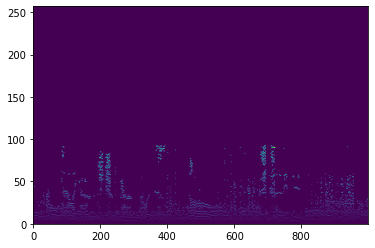

In [ ]:
test = mp3topitch('/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/testing_data/trial_lie_061.wav', 257, 1000)
print(test.shape)
plt.imshow(test, aspect='auto', cmap=cm.viridis)
plt.ylim([0,257])
plt.show()


In [ ]:
## Classifier  ##

import tensorflow as tf
import IPython.display as ipd
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.optimizers import adam_v2
from tensorflow.keras.utils import to_categorical
import numpy as np 
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import IPython.display as ipd
print('finished importing')
! pip install librosa
import librosa
import librosa.display
from google.colab import drive
# drive.mount('/content/drive')

# my_dir = '/content/drive/My Drive/IW06/AliceProject'
# ! mkdir -p '$my_dir'
# os.chdir(my_dir)


def get_seq_model(input_shape, num_classes):
  model = Sequential()
  model.add(LSTM(units=16, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(LSTM(units=8, dropout=0.05, recurrent_dropout=0.35, return_sequences=True))
  model.add(Flatten())
  model.add(Dense(2, activation='softmax'))
#   model.compile(optimizer=keras.optimizers.Adadelta(),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
  model.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(lr=0.001,decay=0.0), metrics=['accuracy'])
  return model

# mfccs = np.load('mfccs_all_loy_no_pad1000.npy').tolist()
# mfccs = np.asarray(mfccs)
# labels = np.load('labels_all_loy.npy')

mfccs = np.load('/content/mfccs_all_loy_no_pad1000.npy').tolist()
mfccs = np.asarray(mfccs)
labels = np.load('/content/labels_all_loy_.npy')

dim_1 = mfccs.shape[1]
dim_2 = mfccs.shape[2]
channels = 1
classes = 2

X = mfccs
print(X.shape)
print(X.shape)
y = labels
# input_shape = (dim_1, dim_2, channels)
# input_shape = (dim_2, channels)
# input_shape = (dim_1, dim_2)
input_shape = (X.shape[1], X.shape[2])

finished importing
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
(116, 20, 1000)
(116, 20, 1000)


In [ ]:
# Import ML models from sklearn
from sklearn.linear_model import LogisticRegression # Regression classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn import svm # Support Vector Machine
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Random Forest and Gradient Boosting Classifier
from sklearn.naive_bayes import MultinomialNB # Naive Bayes Classifier 
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix # Some metrics to check the performance of the models

In [ ]:
# Setting parameters for each algorithm - these are tunable to achieve max accuracy

Classifiers = {'LR':LogisticRegression(random_state=10,C=5,max_iter=200),
               'DTC':DecisionTreeClassifier(random_state=10,min_samples_leaf=2),
               'RF':RandomForestClassifier(random_state=10,n_estimators=100,n_jobs=-1),
               'GBC':GradientBoostingClassifier(random_state=10,n_estimators=400,learning_rate=0.2),
               'SGD':SGDClassifier(loss="hinge", penalty="l2"),
               'SVM':svm.SVC(kernel='linear', C=0.1, probability=True)}

In [ ]:
nsamples, nx, ny = X.shape
X_final = X.reshape((nsamples,nx*ny))
y_final = np.argmax(y, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)

(81, 20000)
(81,)


In [ ]:
nsamples, nx, ny = X.shape
X_final = X.reshape((nsamples,nx*ny))
y_final = np.argmax(y, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)

(81, 20000)
(81,)


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=1)
model = get_seq_model(input_shape, classes)
print(X_train2.shape)
print(y_train2.shape)

history = model.fit(X_train2, y_train2, batch_size=20, epochs=15, verbose=1, validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(81, 20, 1000)
(81, 2)
Epoch 1/15
4/4 [==============================] - 16s 706ms/step - loss: 0.7313 - accuracy: 0.4531 - val_loss: 0.7125 - val_accuracy: 0.4706
Epoch 2/15
4/4 [==============================] - 1s 161ms/step - loss: 0.6589 - accuracy: 0.6719 - val_loss: 0.6921 - val_accuracy: 0.4118
Epoch 3/15
4/4 [==============================] - 1s 170ms/step - loss: 0.6065 - accuracy: 0.7344 - val_loss: 0.6846 - val_accuracy: 0.4118
Epoch 4/15
4/4 [==============================] - 1s 164ms/step - loss: 0.5857 - accuracy: 0.7500 - val_loss: 0.6722 - val_accuracy: 0.4118
Epoch 5/15
4/4 [==============================] - 1s 173ms/step - loss: 0.5747 - accuracy: 0.8750 - val_loss: 0.6770 - val_accuracy: 0.5294
Epoch 6/15
4/4 [==============================] - 1s 163ms/step - loss: 0.5545 - accuracy: 0.8438 - val_loss: 0.6607 - val_accuracy: 0.5882
Epoch 7/15
4/4 [==============================] - 1s 162ms/step - loss: 0.5148 - accuracy: 0.8750 - val_loss: 0.6892 - val_accuracy: 0.5

In [ ]:
X_test2.shape

(35, 20, 1000)

In [ ]:
X_test2.shape

(35, 20, 1000)

In [ ]:
model.predict(X_test2)

array([[0.6590739 , 0.3409261 ],
       [0.49592042, 0.5040796 ],
       [0.31385988, 0.6861401 ],
       [0.538559  , 0.46144098],
       [0.44819072, 0.55180925],
       [0.40228713, 0.59771293],
       [0.8017494 , 0.19825058],
       [0.6125082 , 0.3874918 ],
       [0.39905098, 0.60094905],
       [0.30366692, 0.69633305],
       [0.52283853, 0.4771614 ],
       [0.86991256, 0.13008742],
       [0.35632527, 0.64367473],
       [0.47060555, 0.52939445],
       [0.22406451, 0.77593553],
       [0.6955616 , 0.30443844],
       [0.40506306, 0.5949369 ],
       [0.43247128, 0.5675287 ],
       [0.6560788 , 0.34392115],
       [0.32158145, 0.6784185 ],
       [0.4664044 , 0.53359556],
       [0.19709586, 0.8029041 ],
       [0.67904764, 0.32095236],
       [0.59209955, 0.40790042],
       [0.28405428, 0.7159457 ],
       [0.42718455, 0.5728154 ],
       [0.34824735, 0.65175265],
       [0.2952922 , 0.70470774],
       [0.1275097 , 0.87249035],
       [0.577551  , 0.422449  ],
       [0.

In [ ]:
y_test2

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
model.save('truthorlie.h5')

In [ ]:
test=mp3tomfcc('/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/lie_audio_edited/trial_lie_001_edited.wav',1000)

In [ ]:
test=np.asarray(test)
test=test[np.newaxis, :, :]

In [ ]:
test


array([[[-420.6038   , -415.06674  , -416.17853  , ...,    0.       ,
            0.       ,    0.       ],
        [  46.95934  ,   43.658028 ,   38.72743  , ...,    0.       ,
            0.       ,    0.       ],
        [ -32.92479  ,  -31.132687 ,  -29.62532  , ...,    0.       ,
            0.       ,    0.       ],
        ...,
        [   6.6581316,    6.6261487,    3.0960205, ...,    0.       ,
            0.       ,    0.       ],
        [  -2.5282555,   -5.425036 ,   -9.245214 , ...,    0.       ,
            0.       ,    0.       ],
        [   5.1154623,    6.0134487,    5.94596  , ...,    0.       ,
            0.       ,    0.       ]]], dtype=float32)

In [ ]:
a1

array([[[-34.98186111, -41.35527802, -58.30376053, ...,   0.        ,
           0.        ,   0.        ],
        [115.7618103 , 139.18754578, 179.64541626, ...,   0.        ,
           0.        ,   0.        ],
        [ 29.27865219,  21.05082703,   8.53308296, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [ -0.22887689,  -2.2756741 ,   0.18686271, ...,   0.        ,
           0.        ,   0.        ],
        [  2.32592297,   1.59754169,   2.27254677, ...,   0.        ,
           0.        ,   0.        ],
        [ -3.48687577,  -5.67152882,  -6.92106533, ...,   0.        ,
           0.        ,   0.        ]]])

In [ ]:
a1=X_test2[0:1]

In [ ]:
ans=model.predict(test)

In [ ]:
ans

array([[0.65907353, 0.34092647]], dtype=float32)

In [ ]:
ans[0][0]

0.6590739

In [ ]:

# # import the most useful packages
# import numpy as np 
# import matplotlib
# import math
# import os
# from matplotlib import pyplot as plt
# import IPython.display as ipd
# ! pip install librosa
# import librosa
# import librosa.display


# def mp3tomfcc(file_path, max_pad):
#   audio, sample_rate = librosa.core.load(file_path)
#   mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)
#   pad_width = max_pad - mfcc.shape[1]
#   if (pad_width > 0):
#     mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
#   else:
#     mfcc = mfcc[:,0:max_pad]
#   return mfcc

# model = tf.keras.models.load_model('/content/drive/MyDrive/crime prediction/truthorlie.sav')

test=mp3tomfcc('/content/drive/MyDrive/crime prediction/training-data/deception-audio-datasets/lie_audio_edited/trial_lie_001_edited.wav',1000)
test=np.asarray(test)
test=test[np.newaxis, :, :]
ans=model.predict(test)
if(ans[0][1]>ans[0][0]):
  print('LIE')
else:
  print('TRUTH')

LIE
